## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
MONITOR = ['val_acc','val_loss']
PATIENCE = [10,25]

In [8]:
"""
# 載入 Callbacks, 並將 monitor 設定為監控 validation loss
"""
from keras.callbacks import EarlyStopping


In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for monitor in MONITOR:
    for patience in PATIENCE:
        earlystop = EarlyStopping(monitor=monitor, 
                          patience=patience, 
                          verbose=1
                          )
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[earlystop]
                 )

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        exp_name_tag = "monitor : %s , patience : %s" %(monitor,patience)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.2027 - acc: 0.2704 - val_loss: 2.0750 - val_acc: 0.3189
Epoch 2/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7406 - acc: 0.3934 - val_loss: 1.8119 - val_acc: 0.3774
Epoch 3/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6153 - acc: 0.4328 - val_loss: 1.6844 - val_acc: 0.4128
Epoch 4/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.5436 - acc: 0.4599 - val_loss: 1.6348 - val_acc: 0.4268
Epoch 5/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4885 - acc: 0.4789 - val_loss: 1.5969 - val_acc: 0.4415
Epoch 6/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4450 - acc: 0.4951 - val_loss: 1.5686 - val_acc: 0.4494
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4045 - acc: 0.5089 - val_loss: 1.5465 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.1961 - acc: 0.2732 - val_loss: 2.1169 - val_acc: 0.3235
Epoch 2/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.7394 - acc: 0.3952 - val_loss: 1.7983 - val_acc: 0.3827
Epoch 3/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6172 - acc: 0.4335 - val_loss: 1.7025 - val_acc: 0.4047
Epoch 4/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.5413 - acc: 0.4604 - val_loss: 1.6521 - val_acc: 0.4211
Epoch 5/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.4884 - acc: 0.4791 - val_loss: 1.5994 - val_acc: 0.4393
Epoch 6/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.4424 - acc: 0.4952 - val_loss: 1.5803 - val_acc: 0.4452
Epoch 7/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.4024 - acc: 0.5101 - val_loss: 1.5550 - val_acc

50000/50000 [==============================] - 3s 53us/step - loss: 1.1031 - acc: 0.6223 - val_loss: 1.4733 - val_acc: 0.4868
Epoch 19/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.0809 - acc: 0.6323 - val_loss: 1.4606 - val_acc: 0.4943
Epoch 20/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.0596 - acc: 0.6393 - val_loss: 1.4751 - val_acc: 0.4935
Epoch 21/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.0368 - acc: 0.6495 - val_loss: 1.4566 - val_acc: 0.4969
Epoch 22/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.0136 - acc: 0.6566 - val_loss: 1.4722 - val_acc: 0.4927
Epoch 23/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.9952 - acc: 0.6640 - val_loss: 1.4650 - val_acc: 0.4957s - loss: 0.
Epoch 24/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.9730 - acc: 0.6717 - val_loss: 1.4760 - val_acc: 0.5000
Epoch 25/50
50000/50000 [=========

In [10]:
import pickle
f = open('results.bak', 'wb')
pickle.dump(results, f)

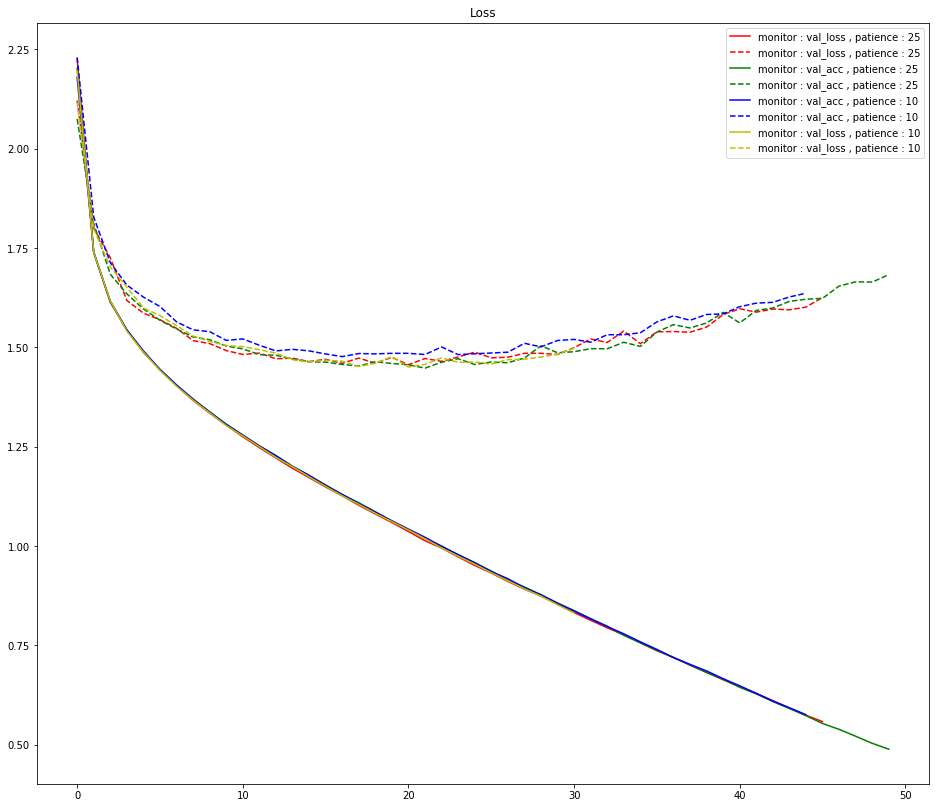

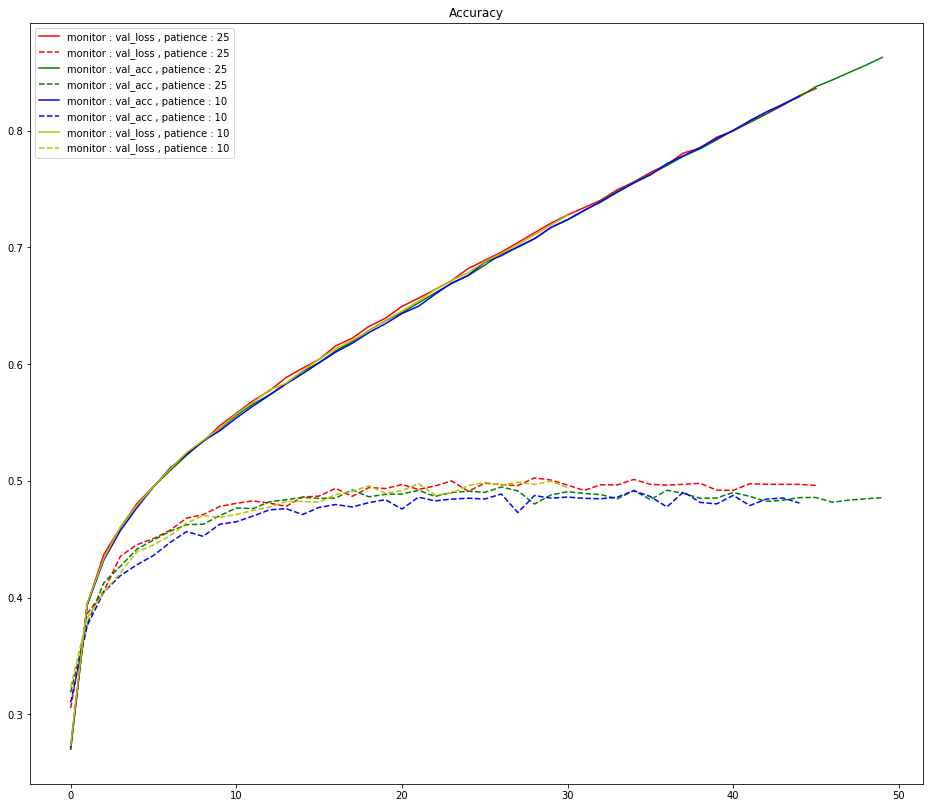

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()